In [1]:
#import sys
#%!{sys.executable} -m pip install gurobipy
## pip or conda install if necessary
## gurobi free license only supports 2000 linear constraints, for high n you will need an (academic) license

In [187]:
import gurobipy as gp
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import string
import matplotlib
import seaborn as sns

In [188]:
def createmodel(n):
    model = gp.Model('nqueens')
    model.params.LogToConsole = 0
    squares = model.addMVar((n, n), vtype=GRB.BINARY, name="x")
    model.setObjective(squares.sum(), GRB.MAXIMIZE)
    for e_1 in range(0,2):
        for e_2 in range(-1,2):
            if (e_1!=0 or e_2!=0) and e_1+e_2>=0:
                model.addConstrs(gp.quicksum(squares[i, j] for i in range(n) for j in range(n) if e_1*i + e_2*j == k) <= 1 for k in range(max(e_1,e_2,0)*-n, (e_1+max(e_2,0))*n))                     
    model.params.PoolSearchMode = 0  
    model.params.PoolSolutions = 10**6
    model.params.PoolGap = 0  
    return(model, squares)

In [189]:
def solve(n, model, squares, mode):
    model.params.LogToConsole = 0   
    model.optimize()
    
    if mode == 1:
        
        image = np.zeros(n*n)
        image = image.reshape((n, n))
        row_labels = range(n)
        col_labels = list(string.ascii_uppercase[0:n])
        if n > 26:
            col_labels = range(n)

        for i in range(n):
            for j in range(n):
                if (i+j)%2 == 0:
                    image[i,j] = 0.5
                if squares.X[i,j] == 1:
                    image[i,j] = squares.X[i,j]+0.5
        plt.figure(figsize=(10,10))
        plt.matshow(image, fignum=1)
        plt.xticks(range(n), col_labels)
        plt.yticks(range(n), row_labels)
        plt.show()
        print('Queens placed: %g' % model.objVal)

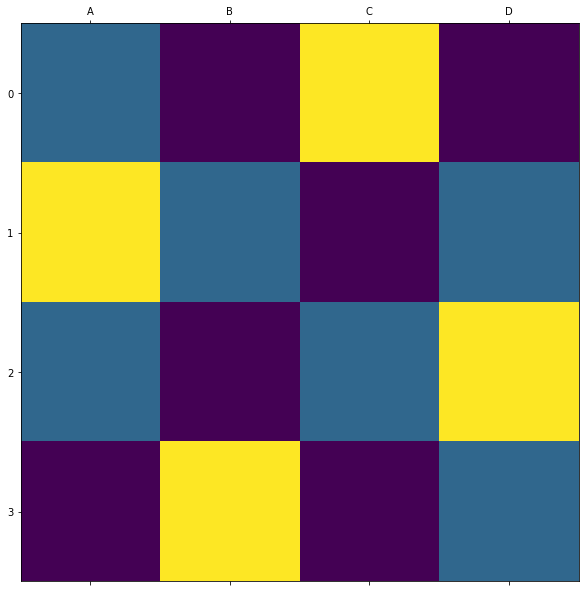

Queens placed: 4


In [193]:
#example how to run the code
n = 4
model, squares = createmodel(n)
model.write("eps_4.lp")
solve(n, model, squares, 1)

In [132]:
for e_1 in range(0,2):
    for e_2 in range(-1,2):
        if (e_1!=0 or e_2!=0) and e_1+e_2>=0:
            print("e_1: "+str(e_1)+", e_2: "+str(e_2))

e_1: 0, e_2: 1
e_1: 1, e_2: -1
e_1: 1, e_2: 0
e_1: 1, e_2: 1


In [185]:
l = 1
k = 290
runtime = np.zeros((k,2))
for i in range(l,k):
    model, squares = createmodel(i*10)
    model.params.LogToConsole = 0
    solve(i, model, squares, 0)
    runtime[i,1] = model.runtime
    runtime[i,0] = i*10
    print(str(i*10)+": "+str(model.runtime))
runtime  
sns.lineplot(y=runtime[:,1], x=runtime[:,0])

10: 0.0040111541748046875
20: 0.0170440673828125
30: 0.036067962646484375
40: 0.05812835693359375
50: 0.04712486267089844
60: 0.07623100280761719
70: 0.10831642150878906
80: 0.1423511505126953
90: 0.21657371520996094
100: 0.2657279968261719
110: 0.31885528564453125
120: 0.4752922058105469
130: 0.6196193695068359


KeyboardInterrupt: 